In [13]:
import os, json
import numpy as np
import pandas as pd

In [14]:
from libcbmwrapper import LibCBMWrapper
import libcbmconfig
import cbm_defaults

In [15]:
dllpath = r'C:\dev\LibCBM\LibCBM\x64\Debug\LibCBM.dll'
dlldir = os.path.dirname(dllpath)
cwd = os.getcwd()
os.chdir(dlldir)
dll = LibCBMWrapper(dllpath)
os.chdir(cwd)

In [16]:

dbpath = 'C:\dev\cbm_defaults\cbm_defaults.db'
test_dir = r"C:\dev\LibCBM\LibCBMPyTest\tests\test1"
yield_age_class_size = 10
yield_table_path = os.path.join(test_dir, "yield.csv")
yield_table_header_row = True
transtions_path = os.path.join(test_dir, "transition_rules.json")

#create a single classifier/classifier value for the single growth curve
classifiers_config = libcbmconfig.classifier_config([
    libcbmconfig.classifier("growth_curve", [
        libcbmconfig.classifier_value("growth_curve1")
    ])
])


transitions_config = []
species_reference = cbm_defaults.load_species_reference(dbpath, "en-CA")

merch_volume_to_biomass_config = libcbmconfig.merch_volume_to_biomass_config(
    dbpath, [
        libcbmconfig.merch_volume_curve(
            classifier_set = ['growth_curve1'], 
            softwood_species_id = species_reference["Spruce"]["species_id"], 
            softwood_age_volume_pairs=[
                    (0, 0.0),
                    (10, 10.0),
                    (20, 15.0),
                    (30, 20.0),
                    (40, 25.0),
                    (50, 30.0),
                    (60, 35.0),
                    (70, 40.0),
                    (80, 45.0),
                    (90, 50.0),
                    (100, 55.0),
                    (110, 60.0),
                    (120, 65.0),
                    (130, 70.0),
                    (140, 75.0),
                    (150, 80.0),
                    (160, 85.625),
                    (170, 90.73529412),
                    (180, 95.84558824),
                    (190, 100.9558824)],
            hardwood_species_id=None,
            hardwood_age_volume_pairs=None)
    ]) 



In [17]:
config = libcbmconfig.initialize_config(
    dbpath = dbpath,
    merch_volume_to_biomass = merch_volume_to_biomass_config,
    classifiers = classifiers_config,
    transitions = transitions_config,
    save_path = "config.json")


In [18]:
dll.Initialize(libcbmconfig.to_string(config))

In [19]:
nstands = 1
age = np.array([0],dtype=np.int32)
classifiers = np.array([1], dtype=np.int32)
spatial_units = np.array([42],dtype=np.int32)
pools = np.zeros((1,len(config["pools"])))
pools[:,0] = 1.0


In [20]:
classifiers.shape

(1,)

In [21]:

op = dll.AllocateOp(nstands)

result = pd.DataFrame()
for i in range(0, 200):
    dll.GetMerchVolumeGrowthOps(
        op, 
        classifiers=classifiers,
        pools=pools,
        ages=age,
        spatial_units=spatial_units,
        last_dist_type=None,
        time_since_last_dist=None,
        growth_multipliers=None)
    iteration_result = pd.DataFrame({x["name"]: pools[:,x["index"]] for x in config["pools"]})
    result = result.append(iteration_result)
    age += 1
    dll.ComputePools([op], pools)

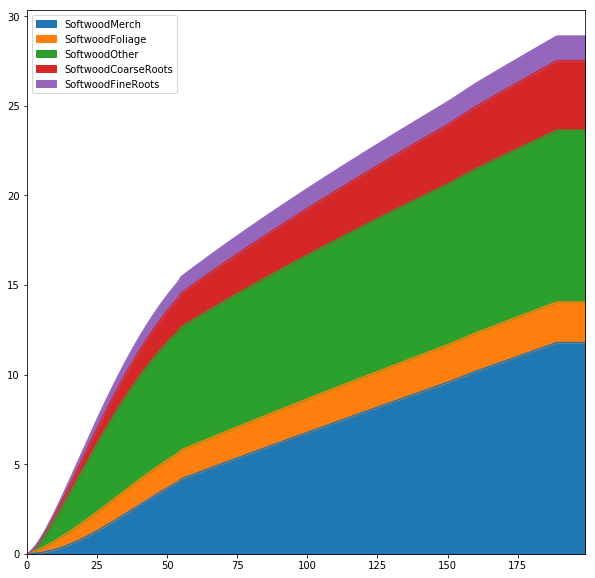

In [22]:
result.reset_index(drop=True) \
    [['SoftwoodMerch','SoftwoodFoliage','SoftwoodOther','SoftwoodCoarseRoots','SoftwoodFineRoots']] \
     .plot(figsize=(10,10), kind="area")

In [23]:
result.reset_index(drop=True) \
    [['SoftwoodMerch','SoftwoodFoliage','SoftwoodOther','SoftwoodCoarseRoots','SoftwoodFineRoots']]

,SoftwoodMerch,SoftwoodFoliage,SoftwoodOther,SoftwoodCoarseRoots,SoftwoodFineRoots
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003017,0.043397,0.028736,0.009600,0.007083
2,0.011354,0.092476,0.098821,0.025949,0.019039
3,0.024637,0.143037,0.193430,0.046359,0.033806
4,0.042659,0.194008,0.306189,0.069894,0.050620
5,0.065262,0.244847,0.433226,0.096005,0.069015
6,0.092308,0.295227,0.571790,0.124315,0.088655
7,0.123672,0.344932,0.719764,0.154537,0.109280
8,0.159230,0.393813,0.875427,0.186440,0.130680
9,0.198861,0.441763,1.037340,0.219830,0.152678


In [18]:
config["pools"]

[{'name': 'Input', 'id': 0, 'index': 0},
 {'name': 'SoftwoodMerch', 'id': 1, 'index': 1},
 {'name': 'SoftwoodFoliage', 'id': 2, 'index': 2},
 {'name': 'SoftwoodOther', 'id': 3, 'index': 3},
 {'name': 'SoftwoodCoarseRoots', 'id': 4, 'index': 4},
 {'name': 'SoftwoodFineRoots', 'id': 5, 'index': 5},
 {'name': 'HardwoodMerch', 'id': 6, 'index': 6},
 {'name': 'HardwoodFoliage', 'id': 7, 'index': 7},
 {'name': 'HardwoodOther', 'id': 8, 'index': 8},
 {'name': 'HardwoodCoarseRoots', 'id': 9, 'index': 9},
 {'name': 'HardwoodFineRoots', 'id': 10, 'index': 10},
 {'name': 'AboveGroundVeryFastSoil', 'id': 11, 'index': 11},
 {'name': 'BelowGroundVeryFastSoil', 'id': 12, 'index': 12},
 {'name': 'AboveGroundFastSoil', 'id': 13, 'index': 13},
 {'name': 'BelowGroundFastSoil', 'id': 14, 'index': 14},
 {'name': 'MediumSoil', 'id': 15, 'index': 15},
 {'name': 'AboveGroundSlowSoil', 'id': 16, 'index': 16},
 {'name': 'BelowGroundSlowSoil', 'id': 17, 'index': 17},
 {'name': 'SoftwoodStemSnag', 'id': 18, 'inde